### NAME: KSHITIJ CHILATE
### ROLL NO.: 35
### BATCH B2
### MACHINE LEARNING LAB
### DATE: 07/08/2025

### Aim: The customer dataset encompasses their purchasing patterns across diverse attributes, intended to aid data scientists and analysts in comprehending the determinants impacting buying choices. It includes demographic details, buying behaviors, and pertinent features. Develop a machine learning model that predicts whether an individual will purchase product or not.

### Perform the EDA
    
### Apply Decision tree algorithm
   
### Evaluate the performance using Precision, Recall, F1 score and accuracy.

### Apply hyper parameter tuning to improve performance.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('shopping_trends.csv')

print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 

In [21]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [22]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [23]:
df.shape

(3900, 19)

In [24]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [25]:
df[df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


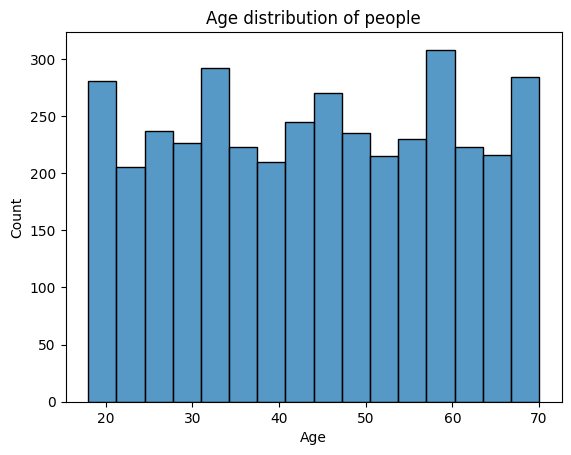

In [26]:
sns.histplot(df.Age)
plt.title("Age distribution of people")
plt.show()

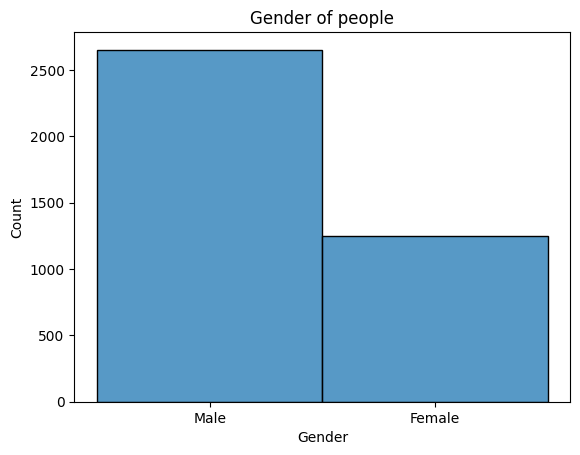

In [28]:
sns.histplot(df.Gender)
plt.title("Gender of people")
plt.show()

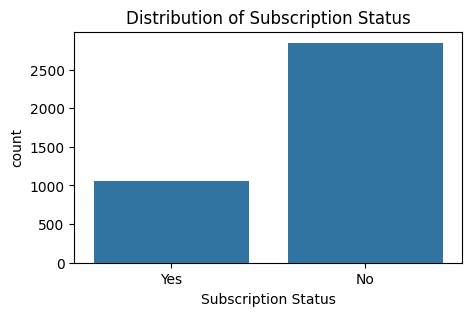

In [29]:
plt.figure(figsize=(5,3))
sns.countplot(x='Subscription Status',data=df)
plt.title("Distribution of Subscription Status")
plt.show()

<Axes: >

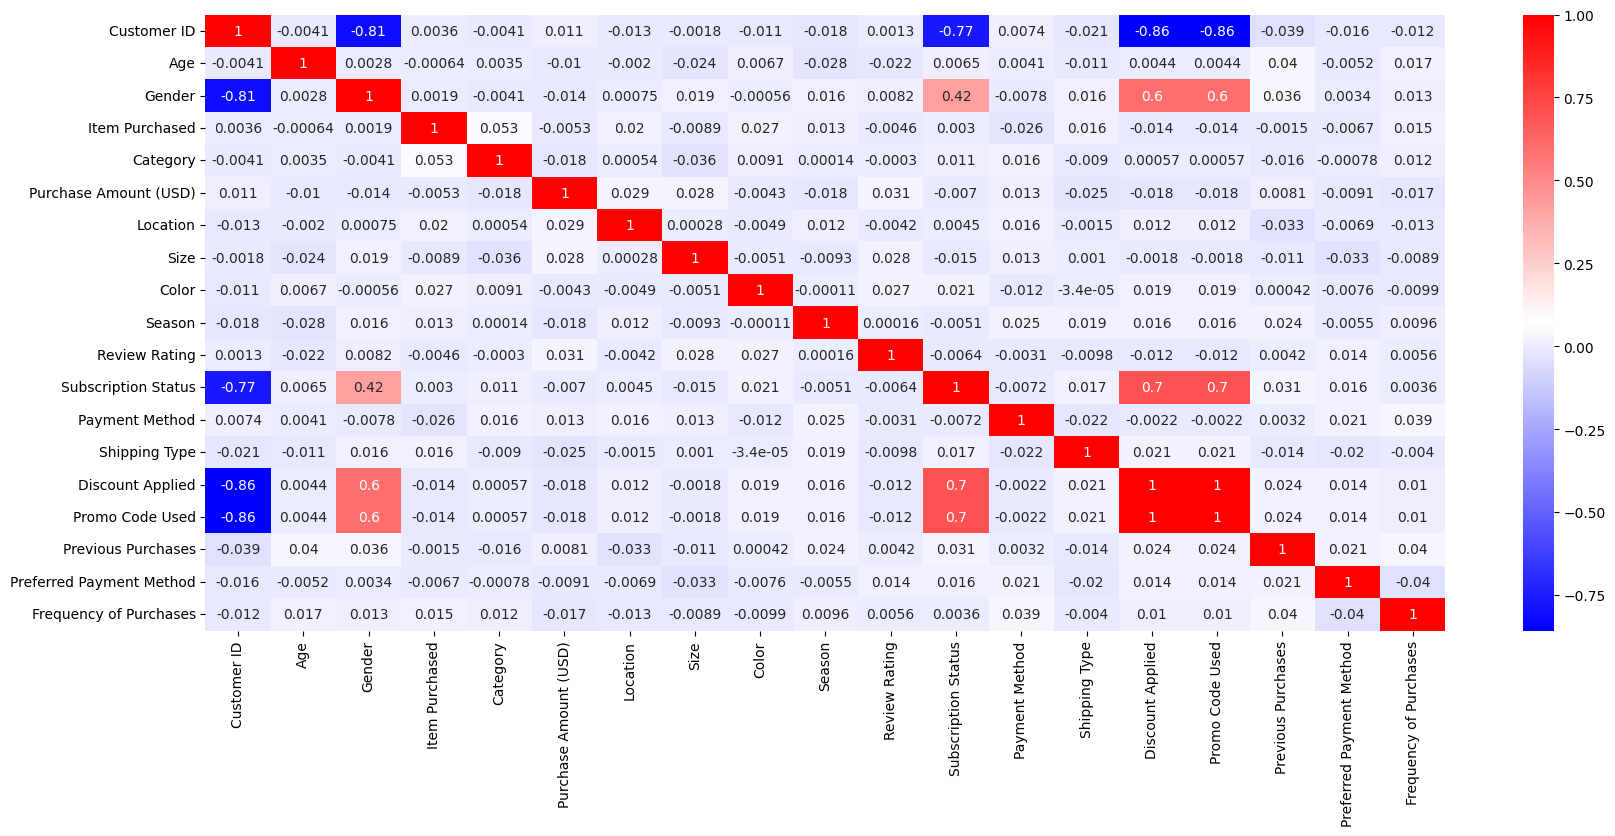

In [62]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(20,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="bwr")


In [38]:
categorical_cols = df.select_dtypes(include='object').columns


for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("DataFrame after Label Encoding:")
print(df.head())

DataFrame after Label Encoding:
   Customer ID  Age  ...  Preferred Payment Method  Frequency of Purchases
0            1   55  ...                         5                       3
1            2   19  ...                         1                       3
2            3   50  ...                         2                       6
3            4   21  ...                         4                       6
4            5   45  ...                         4                       0

[5 rows x 19 columns]


In [45]:

X = df.drop(['Subscription Status','Customer ID'], axis=1)
y = df['Subscription Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data splitting complete.
Training features shape: (3120, 17)
Testing features shape: (780, 17)
Training target shape: (3120,)
Testing target shape: (780,)


In [77]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [78]:
y_pred = dt_model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7923
Precision: 0.6261
Recall: 0.6712
F1 Score: 0.6478

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       558
           1       0.63      0.67      0.65       222

    accuracy                           0.79       780
   macro avg       0.75      0.76      0.75       780
weighted avg       0.80      0.79      0.79       780



In [80]:

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[469  89]
 [ 73 149]]


In [81]:

dt_model = DecisionTreeClassifier( max_depth=8,min_samples_split=16, min_samples_leaf=24)
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully with hyperparameters.")

Decision Tree model trained successfully with hyperparameters.


In [82]:

y_pred = dt_model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8077
Precision: 0.6286
Recall: 0.7928
F1 Score: 0.7012

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       558
           1       0.63      0.79      0.70       222

    accuracy                           0.81       780
   macro avg       0.77      0.80      0.78       780
weighted avg       0.83      0.81      0.81       780



In [84]:

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[454 104]
 [ 46 176]]


In [85]:

dt_model = DecisionTreeClassifier( max_depth=5,min_samples_split=10, min_samples_leaf=15)
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully with hyperparameters.")

Decision Tree model trained successfully with hyperparameters.


In [86]:
y_pred = dt_model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


In [87]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8269
Precision: 0.6261
Recall: 0.9730
F1 Score: 0.7619

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       558
           1       0.63      0.97      0.76       222

    accuracy                           0.83       780
   macro avg       0.81      0.87      0.81       780
weighted avg       0.88      0.83      0.83       780



In [88]:

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[429 129]
 [  6 216]]


In [89]:

dt_model = DecisionTreeClassifier( max_depth=4,min_samples_split=12, min_samples_leaf=16)
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully with hyperparameters.")

Decision Tree model trained successfully with hyperparameters.


In [90]:
y_pred = dt_model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


In [91]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8269
Precision: 0.6261
Recall: 0.9730
F1 Score: 0.7619

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       558
           1       0.63      0.97      0.76       222

    accuracy                           0.83       780
   macro avg       0.81      0.87      0.81       780
weighted avg       0.88      0.83      0.83       780



In [92]:

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[429 129]
 [  6 216]]


In [93]:
dt_model = DecisionTreeClassifier( max_depth=1,min_samples_split=15, min_samples_leaf=13)
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully with hyperparameters.")

Decision Tree model trained successfully with hyperparameters.


In [94]:
y_pred = dt_model.predict(X_test)

print("Predictions made successfully.")

Predictions made successfully.


In [95]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8256
Precision: 0.6201
Recall: 1.0000
F1 Score: 0.7655

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780



In [96]:

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[422 136]
 [  0 222]]


### Conclusion : Precision is inversely proportional to max_depth and directly proportional to min_samples_leaf